# Image Classification with CNN for CIFAR_10 Data

This project aims to develop a convolutional neural network (CNN) model using TensorFlow and Keras to classify images based on the CIFAR-10 dataset, consisting of 10 different classes of 32x32 pixel images, showcasing the effectiveness of deep learning techniques in image classification tasks.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # CIFAR-10 veri setini yükle

In [3]:
x_train.shape

(50000, 32, 32, 3)

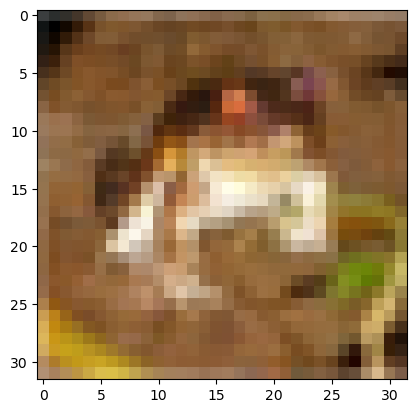

In [4]:
plt.imshow(x_train[0], cmap='gray')

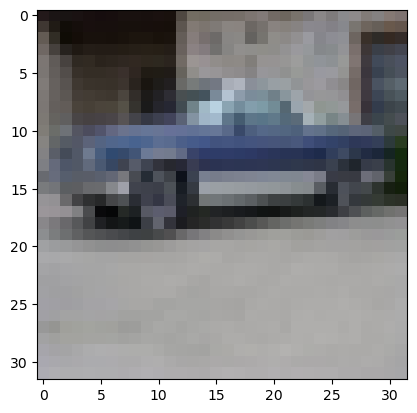

In [5]:
plt.imshow(x_train[10000], cmap='gray')

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
#normalize data    
#resimlerde herbir piksel 0-255 arası değer aldığı için 
#her değeri 255'e bölünce değerler 0 -1 arasaında olacağınddan normalize etmiş oluruz

In [8]:
x_train=x_train/255.0
y_train=y_train/255.0

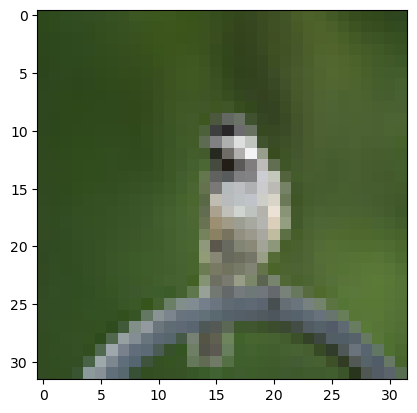

In [9]:
plt.imshow(x_train[54], cmap='gray')

### Convolutional Neural Networks - CNNs Image Classification Resim sınıflandırma modeli

In [22]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))  # 10 fakli lategoriye ayırmamız isteniyor. Multi-Class classification-> softmax
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1) 
#Epoch veya batch_size'ın çok yüksek olması overfitting olasına neden olabilir

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8185 - loss: 0.5303 - val_accuracy: 0.7145 - val_loss: 0.9222
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8279 - loss: 0.5064 - val_accuracy: 0.7184 - val_loss: 0.9480
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8314 - loss: 0.4943 - val_accuracy: 0.7250 - val_loss: 0.9025
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8350 - loss: 0.4872 - val_accuracy: 0.7214 - val_loss: 0.9736
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8332 - loss: 0.4879 - val_accuracy: 0.7270 - val_loss: 0.8982
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8426 - loss: 0.4729 - val_accuracy: 0.7171 - val_loss: 0.9339
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8495 - loss: 0.4553 - val_accuracy: 0.7293 - val_loss: 0.9232
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8468 -

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9143 - loss: 0.2712 - val_accuracy: 0.7231 - val_loss: 1.2444
